In [56]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Data Preparation

In [57]:
data = "../Oprek/byPhiard_01/" 
file_list = os.listdir(data)

print(file_list)

['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']


In [58]:
# Tentukan jalur direktori untuk data latih, validasi, dan uji
train_data = '../Oprek/data_split/train'
test_data = '../Oprek/data_split/test'

In [59]:
# Applying Data normalization and Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    # directory=train_data,
    batch_size=32,
    color_mode="rgb",
    target_size=(128, 128),
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    test_data,
    # directory=test_data,
    batch_size=32,
    color_mode="rgb",
    target_size=(150, 150),
    class_mode="categorical"
)

Found 9100 images belonging to 20 classes.
Found 3900 images belonging to 20 classes.


# Model

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers

# Menggunakan VGG16 pre-trained dari Keras Applications
# base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model = tf.keras.applications.VGG16(include_top=False, weights=None, input_shape=(128, 128, 3))


# Membuat model baru berdasarkan VGG16
model = models.Sequential()

# Menambahkan layer VGG16 ke dalam model baru
model.add(base_model)
 
# Convolutional Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Convolutional Block 2
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

# Convolutional Block 3
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

# Convolutional Block 4
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))


# Flatten layer
model.add(layers.Flatten())

# Dense layers untuk klasifikasi dengan Weight Decay
# model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())

# Output layer dengan 20 kelas
model.add(layers.Dense(20, activation='softmax'))

# Batch Normalization pada output layer
model.add(layers.BatchNormalization())

# Compile model dengan Adam Optimizer dan Gradient Clipping
adam_optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduling
# def schedule(epoch, lr):
#     if epoch < 5:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)

# lr_scheduler = LearningRateScheduler(schedule)
# callbacks = [lr_scheduler]

# Menampilkan ringkasan model
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_87 (Conv2D)          (None, 4, 4, 64)          294976    
                                                                 
 batch_normalization_75 (Ba  (None, 4, 4, 64)          256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 2, 2, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 64)              

# Model Fitting

In [61]:
# Model fitting
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    callbacks=callbacks
)


Epoch 1/5
285/285 [==============================] - 7690s 27s/step - loss: 7.5384 - accuracy: 0.0512 - val_loss: 13.8602 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 2/5
285/285 [==============================] - 7587s 27s/step - loss: 7.5455 - accuracy: 0.0467 - val_loss: 15.3291 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 3/5
285/285 [==============================] - 13757s 48s/step - loss: 8.0972 - accuracy: 0.0595 - val_loss: 1.3263 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 4/5
285/285 [==============================] - 8579s 30s/step - loss: 7.5471 - accuracy: 0.0607 - val_loss: 7.5205 - val_accuracy: 0.0585 - lr: 0.0010
Epoch 5/5
285/285 [==============================] - 13657s 48s/step - loss: 7.5635 - accuracy: 0.0562 - val_loss: 1.7701 - val_accuracy: 0.0500 - lr: 0.0010


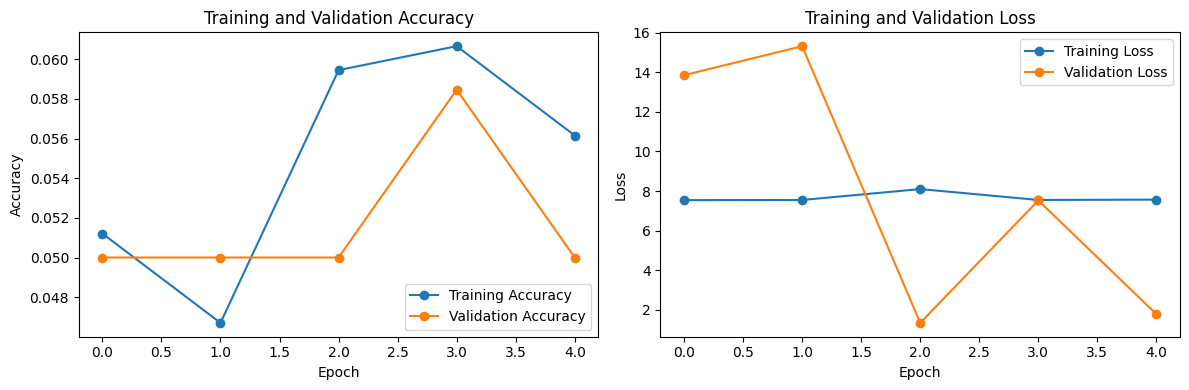

In [71]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# from keras.preprocessing import image
# import numpy as np

# img = image.load_img("../Oprek/Ori_byPhiard/prediction/ba49.mine2.png",
#                      target_size=(128,128), 
#                      color_mode='grayscale')
# img = np.asarray(img)
# plt.imshow(img)
# img = np.expand_dims(img, axis=2)
# img = np.expand_dims(img, axis=0)

# from keras.models import load_model
# saved_model = load_model("model.h5")
# output = saved_model.predict(img)

# max = output[0][0]
# pos = 0
# for i in range(1, 19): 
#     if output[0][i] > max: 
#         max = output[0][i]
#         pos = i
         
# print(output)
# print(max)

# if (pos == 0) :
#     print("ba")
# elif (pos == 1) :
#     print('ca')
# elif (pos == 2) :
#     print('da')
# elif (pos == 3) :
#     print('dha')
# elif (pos == 4) :
#     print('ga')
# elif (pos == 5) :
#     print('ha')
# elif (pos == 6) :
#     print('ja')
# elif (pos == 7) :
#     print('ka')
# elif (pos == 8) :
#     print('la')
# elif (pos == 9) :
#     print('ma')
# elif (pos == 10) :
#     print('na')
# elif (pos == 11) :
#     print('nga')
# elif (pos == 12) :
#     print('nya')
# elif (pos == 13) :
#     print('pa')
# elif (pos == 14) :
#     print('ra')
# elif (pos == 15) :
#     print('sa')
# elif (pos == 16) :
#     print('ta')
# elif (pos == 17) :
#     print('tha')
# elif (pos == 18) :
#     print('wa')
# elif (pos == 19) :
#     print('ya')

In [74]:
# import numpy as np
# # from google.colab import files
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt  # Added import for plt
# %matplotlib inline

# img = image.load_img("../Oprek/Ori_byPhiard/prediction/ba49.mine2.png",
#                      target_size=(128,128), 
#                      color_mode='grayscale')

# for fn in uploaded.keys():
#     # Predicting images
#     path = fn
#     img = image.load_img(path, target_size=(150, 150))
#     imgplot = plt.imshow(img)
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)

#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)

#     print(fn)
    
#     # Assuming your model has 20 output neurons
#     if np.argmax(classes) == 0:
#         print('ba')
#     elif np.argmax(classes) == 1:
#         print('ca')
#     elif np.argmax(classes) == 2:
#         print('da')
#     elif np.argmax(classes) == 3:
#         print('dha')
#     elif np.argmax(classes) == 4:
#         print('ga')
#     elif np.argmax(classes) == 5:
#         print('ha')
#     elif np.argmax(classes) == 6:
#         print('ja')
#     elif np.argmax(classes) == 7:
#         print('ka')
#     elif np.argmax(classes) == 8:
#         print('la')
#     elif np.argmax(classes) == 9:
#         print('ma')
#     elif np.argmax(classes) == 10:
#         print('na')
#     elif np.argmax(classes) == 11:
#         print('nga')
#     elif np.argmax(classes) == 12:
#         print('nya')
#     elif np.argmax(classes) == 13:
#         print('pa')
#     elif np.argmax(classes) == 14:
#         print('ra')
#     elif np.argmax(classes) == 15:
#         print('sa')
#     elif np.argmax(classes) == 16:
#         print('ta')
#     elif np.argmax(classes) == 17:
#         print('tha')
#     elif np.argmax(classes) == 18:
#         print('wa')
#     elif np.argmax(classes) == 19:
#         print('ya')

NameError: name 'files' is not defined

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt  
%matplotlib inline

# Specify the file path of the image you want to test
image_path = "../Oprek/Ori_byPhiard/prediction/ba49.mine2.png"

# Predicting images
img = image.load_img(image_path, target_size=(128, 128))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)

# Assuming your model has 20 output neurons
class_labels = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma',
                'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

predicted_class_index = np.argmax(classes)
predicted_class = class_labels[predicted_class_index]

print("Predicted class:", predicted_class)

# Add if-else statements for each class
if predicted_class_index == 0:
    print('ba')
elif predicted_class_index == 1:
    print('ca')
elif predicted_class_index == 2:
    print('da')
elif predicted_class_index == 3:
    print('dha')
elif predicted_class_index == 4:
    print('ga')
elif predicted_class_index == 5:
    print('ha')
elif predicted_class_index == 6:
    print('ja')
elif predicted_class_index == 7:
    print('ka')
elif predicted_class_index == 8:
    print('la')
elif predicted_class_index == 9:
    print('ma')
elif predicted_class_index == 10:
    print('na')
elif predicted_class_index == 11:
    print('nga')
elif predicted_class_index == 12:
    print('nya')
elif predicted_class_index == 13:
    print('pa')
elif predicted_class_index == 14:
    print('ra')
elif predicted_class_index == 15:
    print('sa')
elif predicted_class_index == 16:
    print('ta')
elif predicted_class_index == 17:
    print('tha')
elif predicted_class_index == 18:
    print('wa')
elif predicted_class_index == 19:
    print('ya')